In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
wine_df = pd.read_csv('winequality-red.csv')

In [7]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
wine_df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [10]:
print(wine_df['quality'].value_counts())

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64


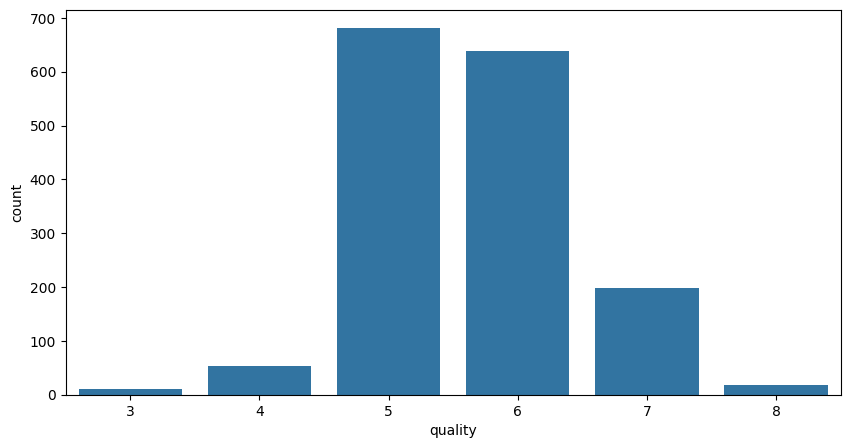

In [11]:
fig = plt.figure(figsize=(10,5))
sns.countplot(x='quality', data=wine_df)
plt.show()

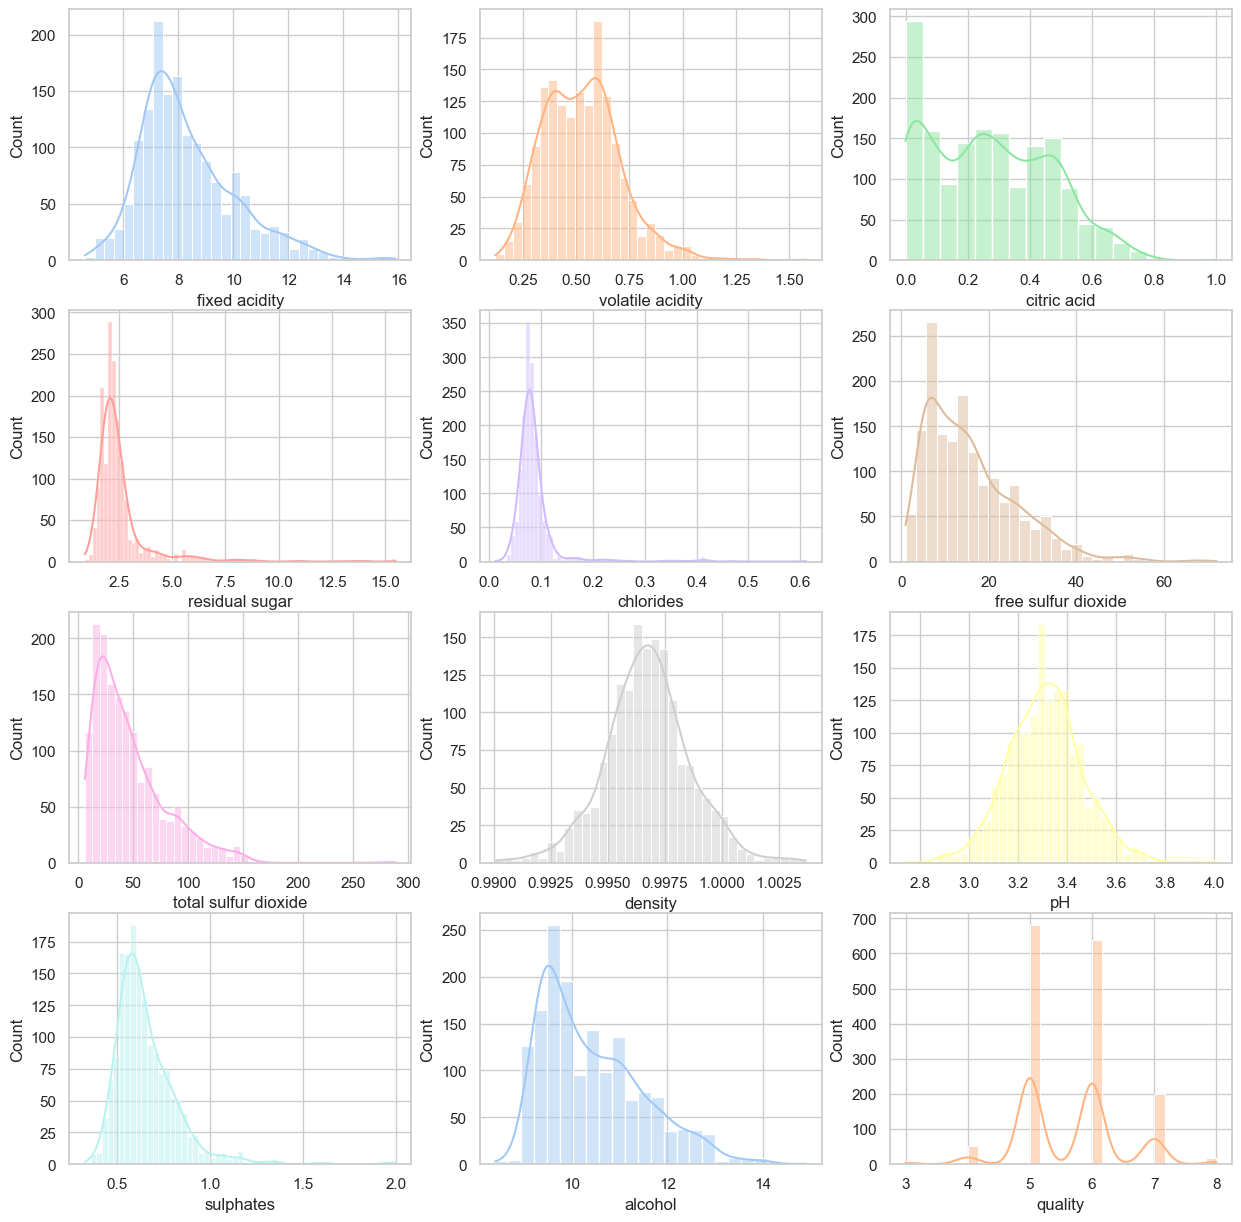

In [20]:
#visualizations the distributions of the all features
sns.set(style="whitegrid")
color = sns.color_palette("pastel")


fig , axl = plt.subplots(4,3, figsize=(15,15))
k = 0
columns = list(wine_df.columns)
for i in range(4):
    for j in range(3):
        if k < len(columns):
            sns.histplot(wine_df[columns[k]], ax=axl[i][j], color=color[k % len(color)], kde=True)
            k += 1
plt.show()            

In [25]:
def log_transform(col):
    return np.log1p(col[0])

wine_df['residual sugar'] = wine_df[['residual sugar']].apply(log_transform, axis=1)
wine_df['chlorides'] = wine_df[['chlorides']].apply(log_transform, axis=1)
wine_df['free sulfur dioxide'] = wine_df[['free sulfur dioxide']].apply(log_transform, axis=1)
wine_df['total sulfur dioxide'] = wine_df[['total sulfur dioxide']].apply(log_transform, axis=1)
wine_df['sulphates'] = wine_df[['sulphates']].apply(log_transform, axis=1)


C:\Users\ramis\AppData\Local\Temp\ipykernel_10468\3067937123.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(col[0])
C:\Users\ramis\AppData\Local\Temp\ipykernel_10468\3067937123.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(col[0])
C:\Users\ramis\AppData\Local\Temp\ipykernel_10468\3067937123.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  return np.log1p(col[0])
C:\Users\ramis\AppData\Lo

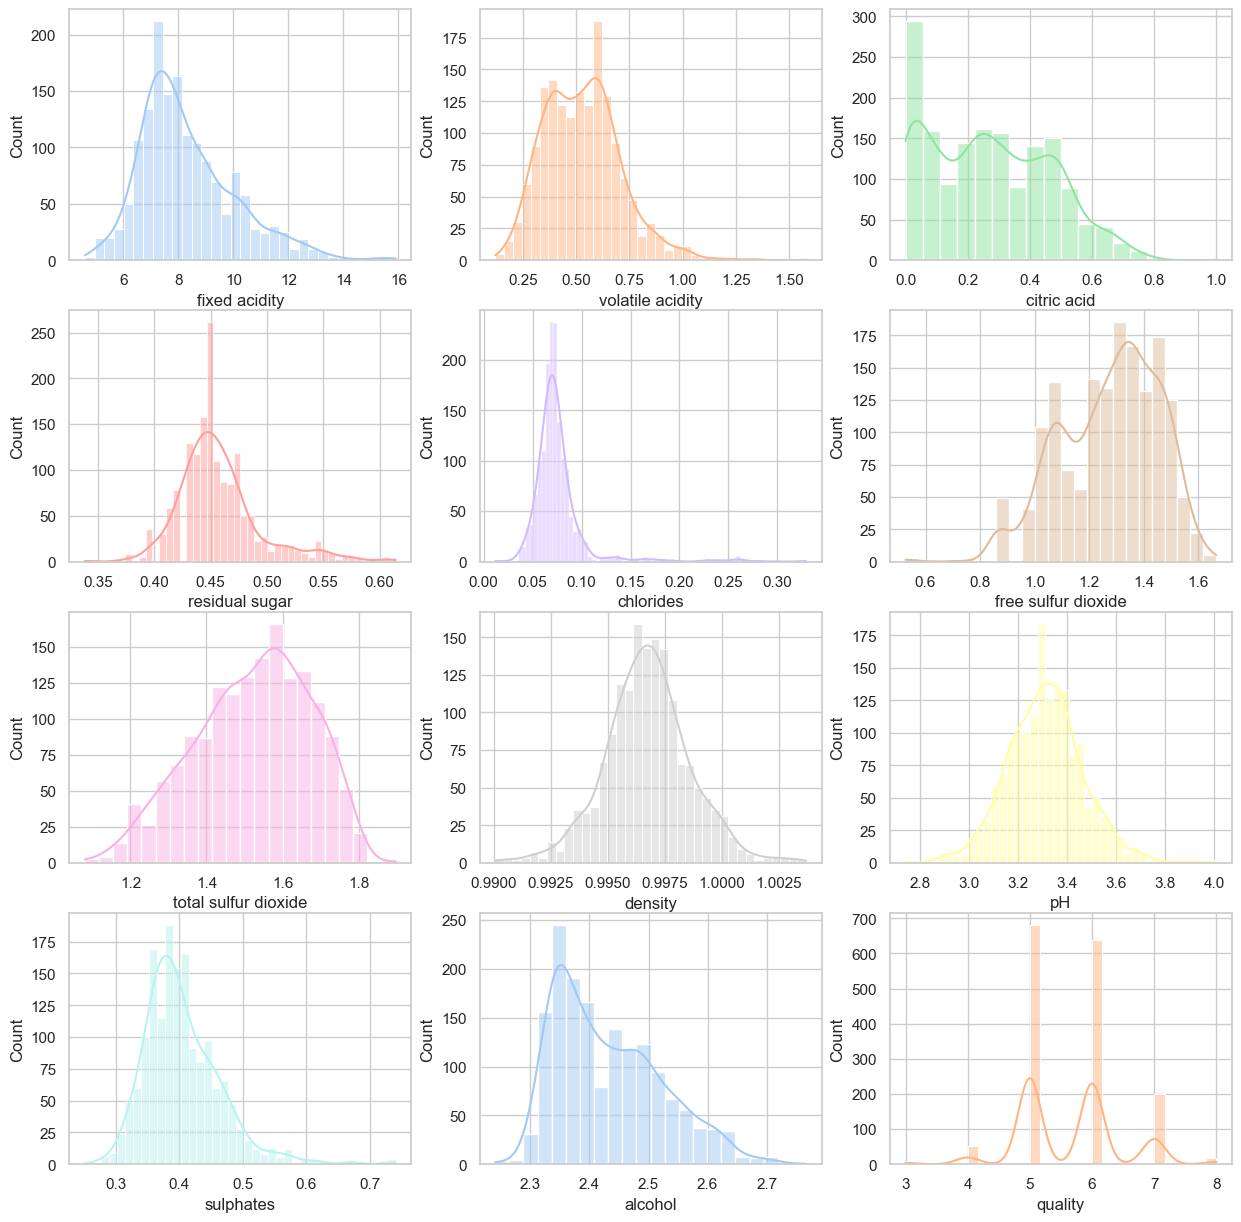

In [31]:
#visualizations the distributions of the all features  after log transforrmation
sns.set(style="whitegrid")
color = sns.color_palette("pastel")


fig , axl = plt.subplots(4,3, figsize=(15,15))
k = 0
columns = list(wine_df.columns)
for i in range(4):
    for j in range(3):
        if k < len(columns):
            sns.histplot(wine_df[columns[k]], ax=axl[i][j], color=color[k % len(color)], kde=True)
            k += 1
plt.show()            

In [30]:
wine_df.corr().sort_values(by='quality', ascending=False)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
quality,0.124052,-0.390558,0.226373,0.025929,-0.144170,-0.049020,-0.162451,-0.174919,-0.057731,0.296140,0.477002,1.000000
alcohol,-0.058257,-0.201562,0.109106,0.086895,-0.252095,-0.086004,-0.237825,-0.491437,0.206157,0.126609,1.000000,0.477002
sulphates,0.200674,-0.292512,0.328905,0.023257,0.308618,0.053326,0.062543,0.161549,-0.166164,1.000000,0.126609,0.296140
citric acid,0.671703,-0.552496,1.000000,0.176772,0.198372,-0.092824,-0.010224,0.364947,-0.541904,0.328905,0.109106,0.226373
fixed acidity,1.000000,-0.256131,0.671703,0.189419,0.120734,-0.180000,-0.115882,0.668047,-0.682978,0.200674,-0.058257,0.124052
residual sugar,0.189419,0.029500,0.176772,1.000000,0.069507,0.081189,0.143399,0.428982,-0.090267,0.023257,0.086895,0.025929
free sulfur dioxide,-0.180000,0.021956,-0.092824,0.081189,-0.009256,1.000000,0.793759,-0.040442,0.098046,0.053326,-0.086004,-0.049020
pH,-0.682978,0.234937,-0.541904,-0.090267,-0.274722,0.098046,-0.006799,-0.341699,1.000000,-0.166164,0.206157,-0.057731
chlorides,0.120734,0.078927,0.198372,0.069507,1.000000,-0.009256,0.065430,0.249294,-0.274722,0.308618,-0.252095,-0.144170
total sulfur dioxide,-0.115882,0.071098,-0.010224,0.143399,0.065430,0.793759,1.000000,0.110437,-0.006799,0.062543,-0.237825,-0.162451


In [32]:
wine_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [33]:
x = wine_df.drop('quality', axis=1)
y = wine_df['quality']

In [34]:
y.value_counts()

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

In [97]:
#data balcing using SMOTE
#pip install imbalanced-learn
from imblearn.over_sampling import SMOTE
smote = SMOTE()
x, y = smote.fit_resample(x, y)
y.value_counts()
def classify(model, x, y):
    from sklearn.model_selection import train_test_split
    from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)

    accuracy = accuracy_score(y_test, y_pred) * 100
    print("Accuracy:", accuracy)
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    return accuracy

In [87]:
#LogistcRegression
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
accuracy_lr = classify(model , x , y)
print(accuracy_lr)

C:\Users\ramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Accuracy:  54.0625


C:\Users\ramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stab

Cross Validation Score:  56.34737460815047
None


C:\Users\ramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [88]:
#Decsion Tree Classifier
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
accuracy_dtc = classify(model , x , y)
print(accuracy_dtc)

Accuracy:  7.7093202229561175
Cross Validation Score:  -32.8826169761774
None


In [89]:
#random forestclassifier
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100)
accuracy_rfc = classify(model, x, y)
print(accuracy_rfc)

Accuracy:  65.0
Cross Validation Score:  58.28683385579938
None


In [78]:
plt.figure(figsize=(10,5))

<Figure size 1000x500 with 0 Axes>

<Figure size 1000x500 with 0 Axes>

C:\Users\ramis\AppData\Local\Temp\ipykernel_10468\1401138007.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracy, palette='pastel')


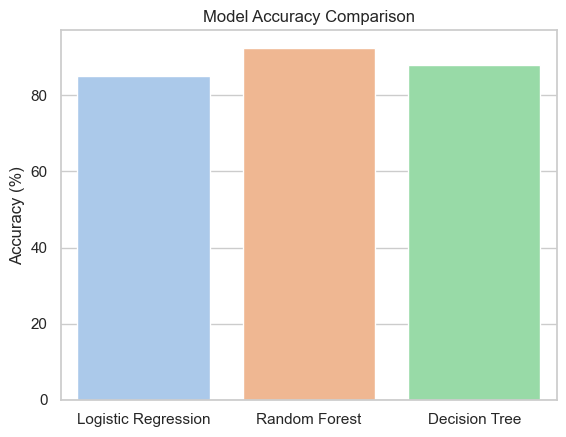

In [94]:
#Plotting the accuracy of all models
models = ['Logistic Regression', 'Random Forest', 'Decision Tree']
accuracy = [85.0, 92.5, 88.0]
sns.barplot(x=models, y=accuracy, palette='pastel')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy (%)')
plt.show()


In [90]:
#predict the quality of wine
#inserting new data

model = RandomForestClassifier()
model.fit(x, y)
sample_data = (7.4,0.7,0,1.9,0.076,11,34,0.9978,3.51,0.56,9.4)
sample_data_np = np.array(sample_data).reshape(1,-1)
prediction = model.predict(sample_data_np)
print("Predicted wine quality:", prediction[0])


Predicted wine quality: 6


C:\Users\ramis\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [86]:
#create a pickle file
import pickle
with open('wine_quality_model.pkl', 'wb') as f:
    pickle.dump(model, f)
    print("Model saved as wine_quality_model.pkl")

Model saved as wine_quality_model.pkl
